In [1]:
import dreye

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from dreye.datasets import load_flowers, load_granada, load_spitschan2016

In [4]:
pr_model = dreye.create_photoreceptor_model(
    [350, 400, 450, 560], 
    labels=['s', 'm1', 'm2', 'l'], 
    capture_noise_level=1e-4
)

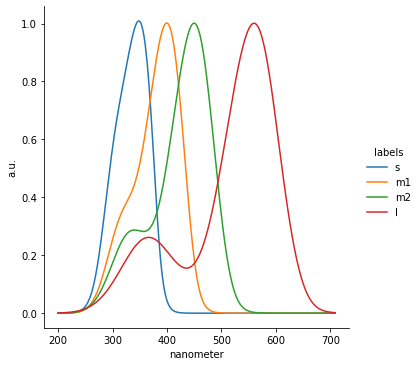

In [5]:
pr_model.sensitivity.plot()

In [6]:
refl = load_flowers(as_spectra=True)

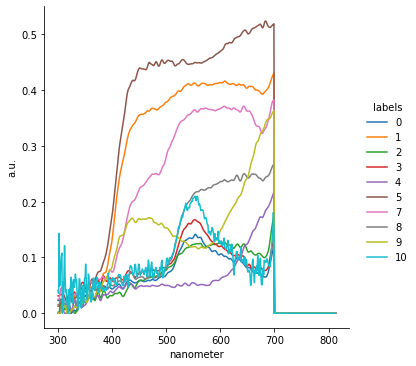

In [7]:
refl[:, :10].plot()

In [8]:
spectra = load_spitschan2016(as_spectra=True)

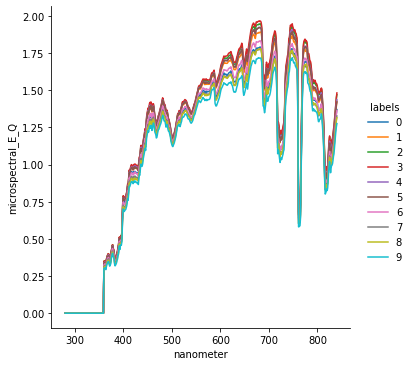

In [9]:
spectra[:, :10].plot()

In [10]:
rspectra = spectra[:, 0] * refl
rspectra[rspectra.magnitude < 0] = 0
rspectra.units

<Unit('microspectral_E_Q')>

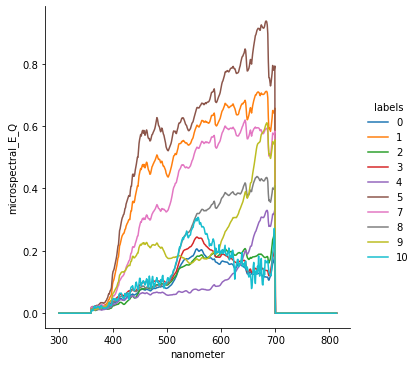

In [11]:
rspectra[:, :10].plot()

In [12]:
gaussians = dreye.create_gaussian_spectrum(np.arange(200, 800), [340, 400, 450, 500, 550], std=30)

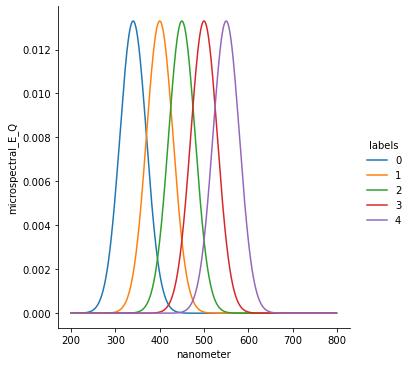

In [13]:
gaussians.plot()

In [14]:
excitations = pr_model.excitation(
    gaussians, 
    return_units=False
)

In [15]:
e_rspectra = pr_model.excitation(
    rspectra, 
    return_units=False
)

In [16]:
excitations

array([[7.46022005e-01, 4.96902424e-01, 2.76460619e-01, 2.02040252e-01],
       [2.40677964e-01, 7.55683903e-01, 5.65156473e-01, 2.12511508e-01],
       [1.35527349e-02, 3.29816166e-01, 7.89949000e-01, 2.40708511e-01],
       [2.17690149e-04, 3.14276023e-02, 4.08885584e-01, 5.39368572e-01],
       [1.00307772e-04, 7.07641756e-04, 5.96109152e-02, 8.42580045e-01]])

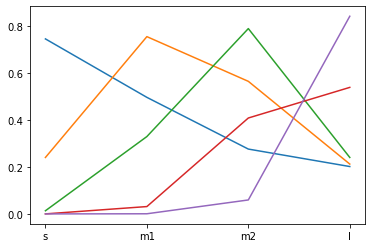

In [17]:
plt.plot(pr_model.names, excitations.T)

In [18]:
e_rspectra.shape

(2189, 4)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(2)

In [21]:
Xt = pca.fit_transform(e_rspectra)

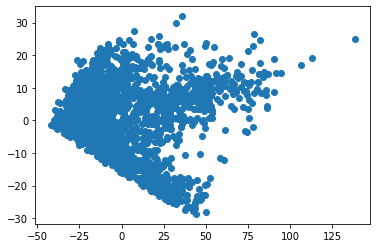

In [22]:
plt.scatter(*Xt.T)

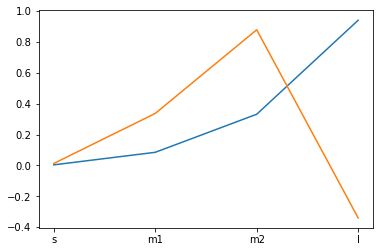

In [23]:
plt.plot(pr_model.names, pca.components_.T)